# Homework 2
#### Assigned: 2019-02-21
#### Due EOD: 2019-02-28

Based on Lecture 4
+ The student fills in the <...> fields.  
+ The student can create as many new cells as necessary in the solution sections.

*Useful LaTeX macros that save typing (click into cell to see them)*
$\def\bX{\boldsymbol{X}}$
$\def\bx{\boldsymbol{x}}$
$\def\by{\boldsymbol{y}}$
$\def\bhy{\boldsymbol{\hat{y}}}$
$\def\bid{\boldsymbol{I}}$

#### Name:  Mengheng Xue
#### NetID: mx586

## Problem 1 (30 points)

Consider Bayesian regression with only one feature.  
The observations are collected into two vectors $\bx$ and $\by$, and there is only one weight $w$.  
The prior distribution of $w$ is normal, with mean $m_0$ and variance $S_0$, i.e 
$$
p(w) = n_1 \exp\left(-\frac{1}{2}\frac{(w-m_0)^2}{S_0}\right)
$$
The likelihood of the $N$ IID observations in the data vector $y$ is also normal, with mean $w\bx\;$ and variance $\sigma^2$, i.e.
$$
p(y|w) = n_2 \exp\left(-\frac{1}{2}\frac{(\by-w\bx)^T\cdot(\by-w\bx)}{\sigma^2}\right)
$$
Using Bayes law
$$
p(w|\by) = n_3 p(\by|w) p(w)
$$
prove that the posterior $p(w|\by)$ is also normal with mean $m_N$ and variance $S_N$, given by eqs (5) and (6) in lecture 4.  
Normalization constants $n_1$, $n_2$, $n_3$ are not important and they do not need to be computed.

## Solution 1

Proof:
\begin{align}
p(w|\by) &= n_3 p(\by|w) p(w)\\
& = n_3n_2n_1\exp\left(-\frac{1}{2}\frac{(w-m_0)^2}{S_0}\right)\exp\left(-\frac{1}{2}\frac{(\by-w\bx)^T\cdot(\by-w\bx)}{\sigma^2}\right)\\
& = n_3n_2n_1 exp\left(-\frac{1}{2}\left( \frac{(w-m_0)^2 \sigma^2 + S_0 (\by-w\bx)^T \cdot (\by-w\bx)}{S_0 \sigma^2}\right)\right)\\
&=n_4n_3n_2n_1exp\left(-\frac{1}{2}\frac{\left(w-\frac{S_0\bx^T\by +m_0\sigma^2}{\sigma^2+S_0\bx^T\bx}\right)^2}{\frac{S_0\sigma^2}{\sigma^2+S_0\bx^T\bx}}\right) \\
& = n_5 exp\left(-\frac{1}{2}\frac{\left(w-\frac{S_0\bx^T\by +m_0\sigma^2}{\sigma^2+S_0\bx^T\bx}\right)^2}{\frac{1}{S_0 + \frac{x^Tx}{\sigma^2}}}\right) & (\mbox{where } n_5 \mbox{ is a constant})
\end{align}
Therefore,  the posterior $p(w|\by)$ is truely normal distribution with
\begin{equation*}
S_N^{-1}=S_0^{-1}+\frac{1}{\sigma^2} \bx^T \;,
\end{equation*}
and
\begin{align*}
m_N & = \frac{S_0\bx^T\by +m_0\sigma^2}{\sigma^2+S_0\bx^T\bx}= S_N\left(S_0^{-1}m_0+\frac{1}{\sigma^2 }\bx^T\by\right)\;.
\end{align*}

## Problem 2 (70 points)

The folder "Data/WineQuality" contains the Wine Quality dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)  

Load the dataset "winequality-white.csv". It contains 4898 observations of 11 numerical white wine attributes.  
It also contains a quality score that ranges from 0 to 10.  
We want compare three models, OLS, Bayes and SGD in predicting quality in terms of the other 11 features.  

Do the following:  
1. Normalize all input features and the output variable quality using the Scikit-Learn MinMaxScaler 
2. Display a description of the dataset
3. Split the dataset, keeping 1000 observations for out-of-sample testing
4. Fit OLS, Bayes and SGD on the training sample and display the weights
5. For each model compute and print out the RMSE and EVAR (explained variance score) in (train) and out of (test) sample
6. Plot the learning curves for each model 
7. Based on the evidence (learning curves, RMSE, EVAR) do you prefer any model over the others?


## Solution 2

### Importing libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mlutils

### display setting

In [2]:
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['legend.fontsize'] = 'x-large'
plt.rcParams['axes.labelsize'] = 'x-large'
plt.rcParams['axes.titlesize'] = 'x-large'
plt.rcParams['xtick.labelsize'] = 'x-large'
plt.rcParams['ytick.labelsize'] = 'x-large'

### data preprocessing

In [3]:
# Importing dataset
dataset = pd.read_csv('winequality-white.csv') 
dataset.head(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler(feature_range = (0, 1))
dataset[dataset.columns]= scaler.fit_transform(dataset[dataset.columns].astype(float))
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527,0.479652
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487,0.147606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935,0.333333
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097,0.500000
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# split input and output variables 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1000, random_state = 2)

### model fitting

In [6]:
# model fit 
from sklearn.linear_model import LinearRegression, BayesianRidge, SGDRegressor

# OLS
ols = LinearRegression(fit_intercept=True) 
ols.fit(X_train, y_train)

# bayes
brg = BayesianRidge(compute_score=True) 
brg.fit(X_train, y_train)

# SGD
sgd = SGDRegressor(max_iter=1000, tol=1e-4, verbose=0) 
sgd.fit(X_train, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.0001,
       validation_fraction=0.1, verbose=0, warm_start=False)

### display weights

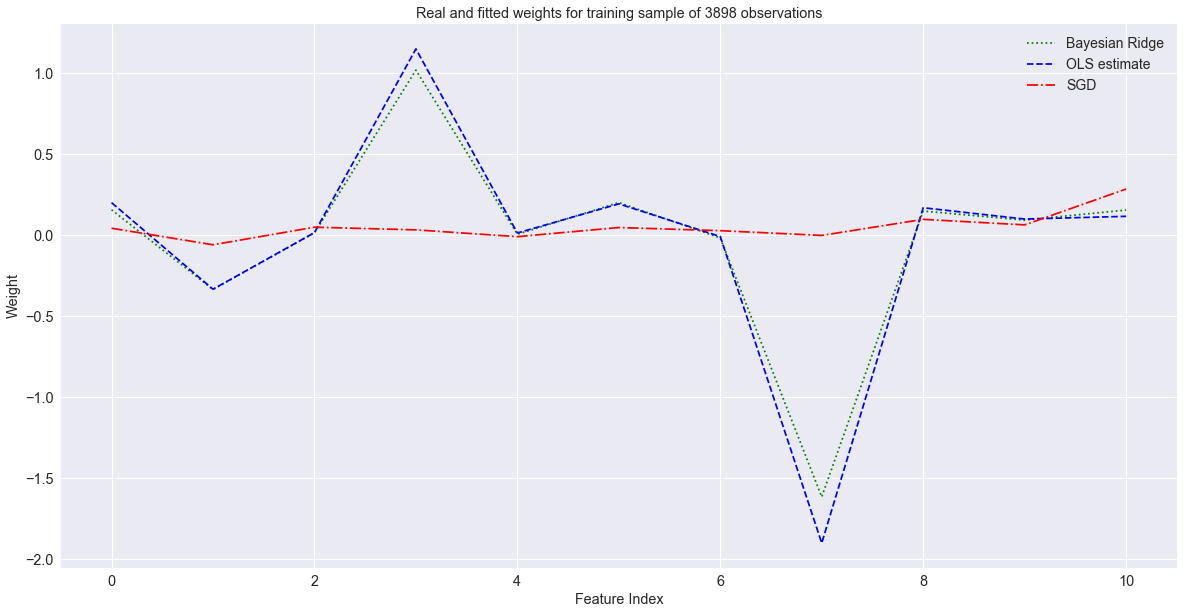

In [7]:
plt.figure()
plt.plot(brg.coef_, color='green', linestyle=':', label="Bayesian Ridge")
plt.plot(ols.coef_, color='blue', linestyle='--', label="OLS estimate")
plt.plot(sgd.coef_, color='red', linestyle='-.', label="SGD")
plt.xlabel("Feature Index")
plt.ylabel("Weight")
plt.title("Real and fitted weights for training sample of {} observations".format(len(X_train)))
plt.legend(loc="best", prop=dict(size=14));

### model metrics

In [8]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from math import sqrt

# OLS
y_train_pred_ols = ols.predict(X_train)
y_test_pred_ols = ols.predict(X_test)
evar_train_ols = explained_variance_score(y_train, y_train_pred_ols)
evar_test_ols = explained_variance_score(y_test, y_test_pred_ols)
rmse_train_ols = sqrt(mean_squared_error(y_train, y_train_pred_ols))
rmse_test_ols =  sqrt(mean_squared_error(y_test, y_test_pred_ols))

print("ols: ")
print("train RMSE = {0:5.4f}".format(rmse_train_ols))
print("test RMSE = {0:5.4f}".format(rmse_test_ols ))
print("train EVAR = {0:5.4f}".format(evar_train_ols))
print("test EVAR = {0:5.4f}".format(evar_test_ols))
print(" ")

# bayes
y_train_pred_brg = brg.predict(X_train)
y_test_pred_brg = brg.predict(X_test)
evar_train_brg = explained_variance_score(y_train, y_train_pred_brg)
evar_test_brg = explained_variance_score(y_test, y_test_pred_brg)
rmse_train_brg = sqrt(mean_squared_error(y_train, y_train_pred_brg))
rmse_test_brg =  sqrt(mean_squared_error(y_test, y_test_pred_brg))

print("brg: ")
print("train RMSE = {0:5.4f}".format(rmse_test_ols))
print("test RMSE = {0:5.4f}".format(rmse_test_ols ))
print("train EVAR = {0:5.4f}".format(evar_train_brg))
print("test EVAR = {0:5.4f}".format(evar_test_brg))
print(" ")

# SGD
y_train_pred_sgd = sgd.predict(X_train)
y_test_pred_sgd = sgd.predict(X_test)
evar_train_sgd = explained_variance_score(y_train, y_train_pred_sgd)
evar_test_sgd = explained_variance_score(y_test, y_test_pred_sgd)
rmse_train_sgd = sqrt(mean_squared_error(y_train, y_train_pred_sgd))
rmse_test_sgd = sqrt(mean_squared_error(y_test, y_test_pred_sgd))

print("sgd: ")
print("train RMSE = {0:5.4f}".format(rmse_train_sgd))
print("test RMSE = {0:5.4f}".format(rmse_test_sgd))
print("train EVAR = {0:5.4f}".format(evar_train_sgd))
print("test EVAR = {0:5.4f}".format(evar_test_sgd))

ols: 
train RMSE = 0.1247
test RMSE = 0.1276
train EVAR = 0.2893
test EVAR = 0.2394
 
brg: 
train RMSE = 0.1276
test RMSE = 0.1276
train EVAR = 0.2890
test EVAR = 0.2481
 
sgd: 
train RMSE = 0.1318
test RMSE = 0.1294
train EVAR = 0.2075
test EVAR = 0.2172


### learning curves 

[(0, 0.3), Text(0.5, 1.0, 'SGD')]

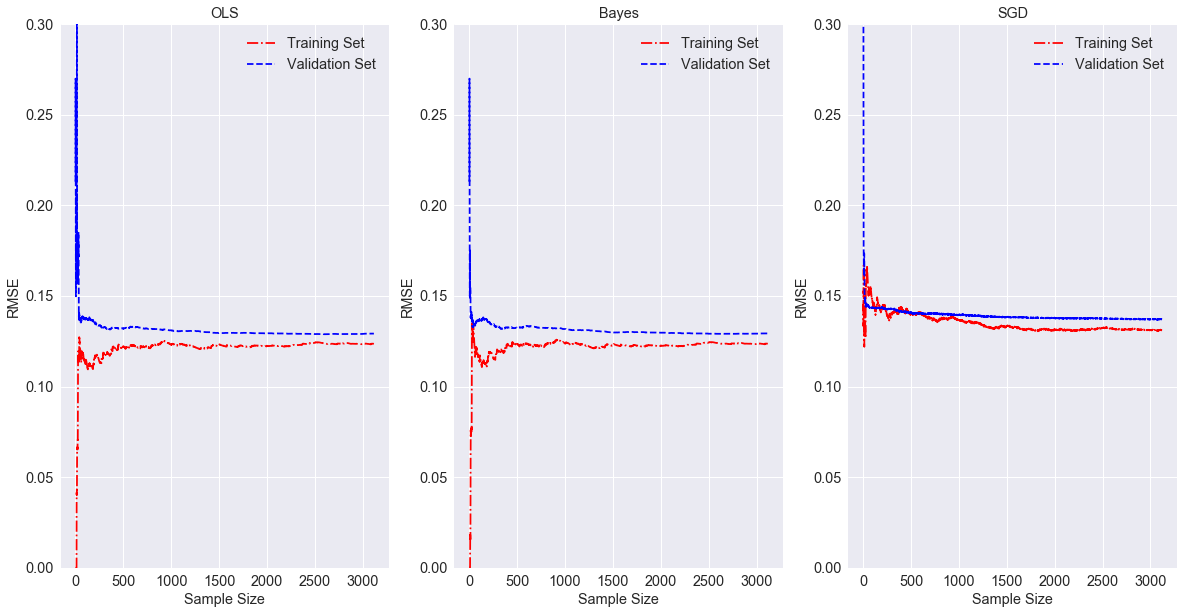

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
plt.subplots_adjust(hspace=1)
mlutils.plot_learning_curves(ols, X_train, y_train, ax1, test_size=0.2,random_state=4)
ax1.set(ylim=[0, 0.3], title='OLS')

mlutils.plot_learning_curves(brg, X_train, y_train, ax2, test_size=0.2,random_state=4)
ax2.set(ylim=[0, 0.3], title='Bayes')

mlutils.plot_learning_curves(sgd, X_train, y_train, ax3,  test_size=0.2,random_state=4)
ax3.set(ylim=[0, 0.3], title='SGD')

### Based on the evidence (learning curves, RMSE, EVAR) do you prefer any model over the others?

Ans: Based on learning curves, RMSE and EVAR, I think SGD is the best model in this case. 
1. From RMSE and EVAR we can see that OLS and Bayes perform similarly, and SGD obtains relatively higher RMSE and relatively lower EVAR scores in both training and test sets, which means OLS and Bayes are more accurate models in predicting the quality of wines.  
2. From learning curves, all of the three models perform well. We could see that the gaps between the learning curve of training and validation sets are all very narrow, also the overall error level is low, which means that all three models can be well generalized. However, we could see that for OLS and Bayes, the learning cruves converge to a little bit lower error level, which shows these two models may still outperform in terms of learning curves. 